In [ ]:
import json
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

In [ ]:
os.listdir()

['.config',
 'mask-word-cloud-white-background.webp',
 'shared_task_dev_public.jsonl',
 'AHN16972_10.ipynb',
 'feverous_train_challenges.jsonl',
 'sample_df.csv',
 'wiki_001.jsonl',
 'upvote.png',
 'train.jsonl',
 'test.ipynb',
 'fever2-fixers-dev.jsonl',
 'shared_task_dev.jsonl',
 'paper_test.jsonl',
 'image-2.png',
 '.ipynb_checkpoints.zip',
 'sample_data']

In [ ]:
data = []
with open('./train.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
data


[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]]},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]]},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'History of art includes architecture, dance, sculpture, music, painting, poetry literature, theatre, narrative, film, photography and graphic arts.',
  'evidence': [[[255136, 254645, 'History_of_art', 2]]]},
 {'id': 156709,
  'verifiable': 'VERIFIABLE',
  'label': 'REFUTES',
  'claim': 'Adrienne Bailon is an accountant.',
  'evidence': [[[180804, 193183, 'Adrienne_Bailon', 0]]]},
 {'id': 83235,
  'verifiable': 'NOT VERIFIABLE',
  'label'

In [ ]:
df = pd.DataFrame(data)
df.head()

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"


In [ ]:
df['label'].value_counts()

label
SUPPORTS           80035
NOT ENOUGH INFO    35639
REFUTES            29775
Name: count, dtype: int64

In [ ]:
df['claim'].nunique()

135545

In [ ]:
word_counts = Counter()
for _, row in df.iterrows():
    word_counts.update(row['claim'].split())
word_counts.most_common(20)

[('a', 49518),
 ('is', 46894),
 ('in', 39796),
 ('the', 38575),
 ('was', 33939),
 ('of', 27814),
 ('The', 19580),
 ('an', 13519),
 ('has', 11753),
 ('by', 11731),
 ('and', 9404),
 ('on', 9301),
 ('to', 8679),
 ('for', 7721),
 ('with', 4849),
 ('American', 4710),
 ('film', 4533),
 ('from', 4346),
 ('as', 4198),
 ('not', 4175)]

<ipython-input-10-25015e3fd6aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette=palette)


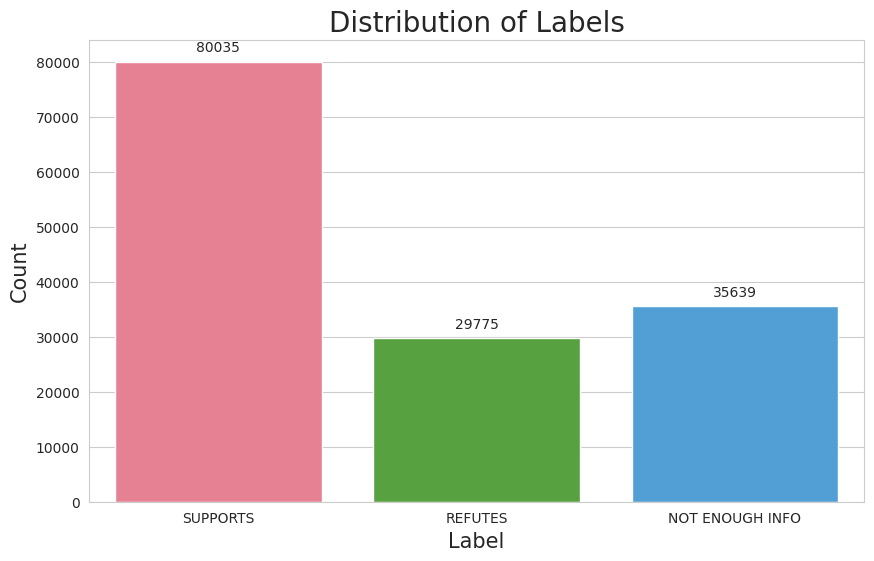

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)

# Create a countplot
ax = sns.countplot(data=df, x='label', palette=palette)

# Add a title and increase the font size
plt.title('Distribution of Labels', fontsize=20)

# Increase the size of the x and y labels
ax.set_xlabel('Label', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Add the actual count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

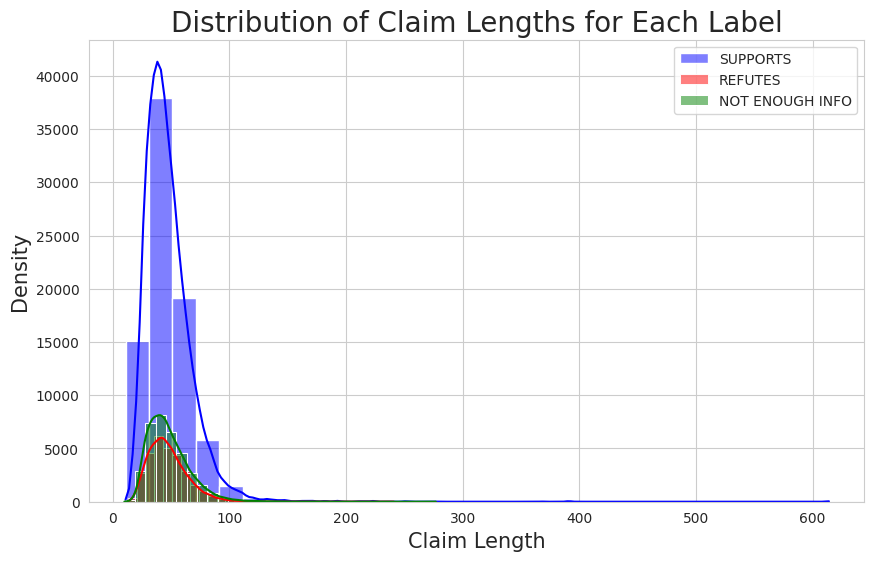

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'claim' is a column containing the claims

# Calculate the length of each claim and store it in a new column 'claim_length'
df['claim_length'] = df['claim'].apply(len)

# Create a separate DataFrame for each label
df_supports = df[df['label'] == 'SUPPORTS']
df_refutes = df[df['label'] == 'REFUTES']
df_not_enough_info = df[df['label'] == 'NOT ENOUGH INFO']

# Create a histogram of the claim lengths for each label
plt.figure(figsize=(10, 6))
sns.histplot(df_supports['claim_length'], bins=30, color='blue', label='SUPPORTS', kde=True)
sns.histplot(df_refutes['claim_length'], bins=30, color='red', label='REFUTES', kde=True)
sns.histplot(df_not_enough_info['claim_length'], bins=30, color='green', label='NOT ENOUGH INFO', kde=True)
plt.title('Distribution of Claim Lengths for Each Label', fontsize=20)
plt.xlabel('Claim Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend()
plt.show()


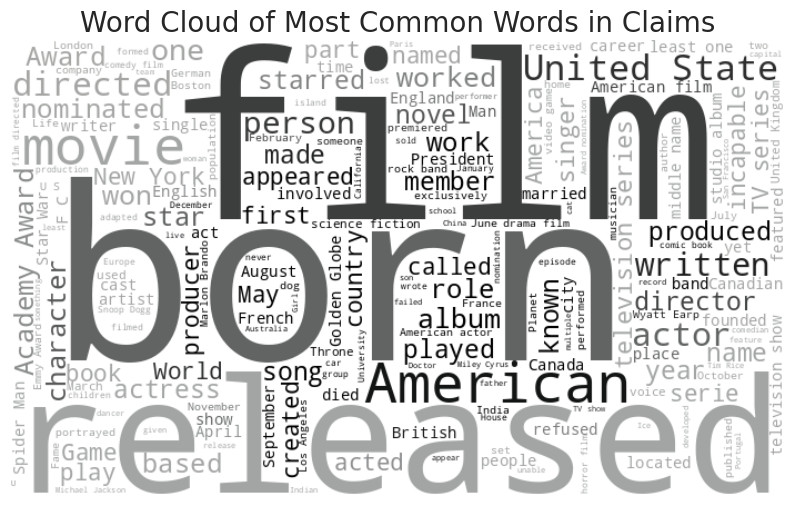

In [ ]:
mask = np.array(Image.open('image-2.png'))
color_func = ImageColorGenerator(mask)
text = ' '.join(claim for claim in df['claim'])
# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='steelblue').generate(text)
# Apply the color function
wordcloud.recolor(color_func=color_func)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Claims', fontsize=20)
plt.show()

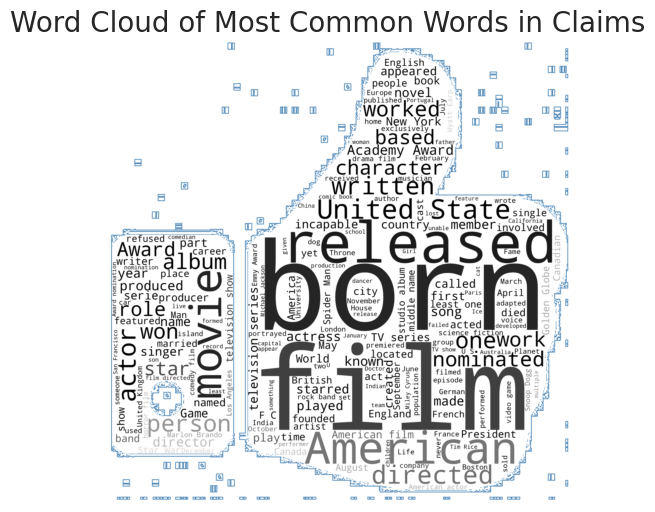

In [ ]:
# Load an image that will be used as a mask for the word cloud
mask = np.array(Image.open('upvote.png'))
color_func = ImageColorGenerator(mask)
text = ' '.join(claim for claim in df['claim'])
wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='steelblue').generate(text)
wordcloud.recolor(color_func=color_func)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Claims', fontsize=20)
plt.show()

In [ ]:
import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize a WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [ ]:
# Define a function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into a string
    text = ' '.join(words)
    return text

In [ ]:
# Preprocess the claims
df['claim'] = df['claim'].apply(preprocess_text)

In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.util import minibatch, compounding
from spacy.training.example import Example

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load spaCy's English model for NER
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Add the NER component to the pipeline
ner = nlp.get_pipe('ner')

In [ ]:
# Function to perform Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

In [ ]:
pip install pandas


In [ ]:

df['claim_entities'] = df['claim'].apply(extract_entities)



In [ ]:
print(len(df))
df

145449


,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"
...,...,...,...,...,...
145444,75062,VERIFIABLE,REFUTES,Led Zeppelin released an eponymous debut album...,"[[[91851, 104659, Led_Zeppelin, 6], [91851, 10..."
145445,149256,VERIFIABLE,SUPPORTS,Taal was romantic.,"[[[292586, 285327, Taal_-LRB-film-RRB-, 0]], [..."
145446,13287,VERIFIABLE,SUPPORTS,Her stars American actress Rooney Mara.,"[[[28520, 34848, Her_-LRB-film-RRB-, 3], [2852..."
145447,13114,VERIFIABLE,SUPPORTS,J. R. R. Tolkien created Gimli.,"[[[28359, 34669, Gimli_-LRB-Middle-earth-RRB-,..."


In [ ]:
empty_claim_entities = df[df['claim_entities'].apply(len) == 0]

In [ ]:
print(len(empty_claim_entities))
empty_claim_entities

11933


,id,verifiable,label,claim,evidence,claim_entities
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]",[]
18,207456,VERIFIABLE,SUPPORTS,Stranger than Fiction is a film.,"[[[245342, 246172, Stranger_than_Fiction_-LRB-...",[]
36,56204,NOT VERIFIABLE,NOT ENOUGH INFO,Keith Urban is a person who sings.,"[[[176603, None, None, None], [178904, None, N...",[]
59,103450,NOT VERIFIABLE,NOT ENOUGH INFO,The blue-ringed octopus hunts sharks.,"[[[121444, None, None, None]]]",[]
93,104690,VERIFIABLE,SUPPORTS,Land Rover makes cars.,"[[[122985, 137249, Land_Rover, 0]], [[122985, ...",[]
...,...,...,...,...,...,...
145360,156184,VERIFIABLE,SUPPORTS,Her's genre was that of a romantic science-fic...,"[[[180240, 192776, Her_-LRB-film-RRB-, 0]], [[...",[]
145377,221776,VERIFIABLE,REFUTES,Friendship has been studied only in sociology.,"[[[264102, 261652, Friendship, 2]]]",[]
145379,52502,VERIFIABLE,REFUTES,Lions are the smallest living cat.,"[[[68812, 79633, Lion, 2]]]",[]
145388,199150,VERIFIABLE,REFUTES,To the Bone is a horror film.,"[[[234149, 237069, To_the_Bone_-LRB-film-RRB-,...",[]
